In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import KNNImputer

In [4]:
dataframe = pd.read_csv('train.csv')

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
print("The shape of the training set is", dataframe.shape)

The shape of the training set is (1460, 81)


In [8]:
dataframe['Alley'] = dataframe['Alley'].fillna(value = 'None')

In [28]:
def corr(a):
    data = a.select_dtypes(exclude = 'object')
    numcorr = data.corr()
    plt.figure(figsize = (10, 1))
    sns.heatmap(numcorr.sort_values(by = 'SalePrice', ascending = False).head(1), cmap = 'Blues')
    plt.title(" Numerical features correlation with the sale price", weight='bold', fontsize=18)
    plt.xticks(weight='bold')
    plt.yticks(weight='bold', color='dodgerblue', rotation=0)


    plt.show()

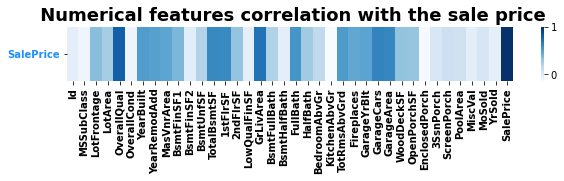

In [29]:
corr(dataframe)

In [8]:
numeric_data = dataframe.select_dtypes(include=[np.number])
categorical_data = dataframe.select_dtypes(exclude=[np.number])

In [9]:
numeric_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorical_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Variable Identification

* Predictor Variables:

        'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',SaleCondition

* Target Variables:
    
    'SalePrice'

#### Data Types

* Numeric Data-Types:
   'Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
* String Data-Types:
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'
    
       

In [27]:
# Let's have a closer look at the correlation between the predictors and the target
data = dataframe.select_dtypes(exclude = 'object')
numcorr = data.corr()
s = numcorr['SalePrice'].sort_values(ascending = False).head(10).to_frame()
s

SalePrice
SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
FullBath       0.560664
TotRmsAbvGrd   0.533723
YearBuilt      0.522897

We can see that the overall Quality of the housesand the Ground Area have a lot more correlation for Sale price.

### Missing Value Treatment

First we'll look at the Numeric data.

In [49]:
# for i in range(numeric_data.shape[1]):
#     n_miss = numeric_data[numeric_data.columns[i]].isnull().sum()
#     perc = n_miss / dataframe.shape[0] * 100
#     print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))


In [50]:
X = numeric_data.drop(columns = 'SalePrice').values
y = numeric_data['SalePrice'].values

In [51]:

print('Missing: %d' % sum(np.isnan(X).flatten()))

Missing: 348


In [52]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X)
Xtrans = imputer.transform(X)

In [53]:
from numpy import isnan
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 0


In [54]:
df1 = pd.DataFrame(data = Xtrans, columns = numeric_data.drop(columns = 'SalePrice').columns)
df2 = pd.DataFrame(data = y, columns = ['SalePrice'])
numeric_data1 = pd.concat([df1, df2])

Let's take a look at the categorical data

In [55]:
categorical_data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [56]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(categorical_data)
x_cat = imp.transform(categorical_data)
categorical_data1 = pd.DataFrame(data = x_cat, columns = categorical_data.columns)

In [57]:
print(len(categorical_data1.MSZoning.unique()))

5


### Encoding of the Categorical Data.

In [58]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [59]:
list1 = []#more than 2
list2 = []# less than or equal to 2
for i in categorical_data1.columns:
    if(len(categorical_data1[i].unique())>2):
        list1.append(i)
    else:
        list2.append(i)

In [60]:
categorical_data11 = categorical_data1[list2].apply(LabelEncoder().fit_transform)

In [61]:
categorical_data12 = categorical_data1[list1].apply(LabelEncoder().fit_transform)

### Feature Selection for Binary leveled categorical data

C:\Users\Godwin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.00886612 0.00404158 0.9870923 ]


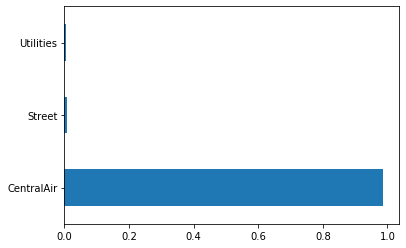

In [62]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(categorical_data11,df2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=categorical_data11.columns)
feat_importances.nlargest(3).plot(kind='barh')
plt.show()

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(categorical_data11,df2)
dfscores = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(categorical_data11.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top2 = featureScores.nsmallest(3,'Score')  #print 10 best features

C:\Users\Godwin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
top2

Specs         Score
0      Street  1.663856e-17
2  CentralAir  5.243914e-10
1   Utilities  1.000000e+00

In [65]:
binary_leveled_data = categorical_data11[['CentralAir', 'Street']]

### Feature Selection for Numeric Data

C:\Users\Godwin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.0052277  0.0084271  0.01172566 0.3145224  0.00802062 0.04340032
 0.02237394 0.00683294 0.02318925 0.00218959 0.00465368 0.03562695
 0.03056053 0.01756371 0.00065477 0.09160632 0.00968211 0.00244502
 0.06709651 0.00708604 0.01045817 0.0037596  0.01703108 0.02767206
 0.02071957 0.15228449 0.02486591 0.00633983 0.00633075 0.00201365
 0.00171718 0.00287596 0.0018391  0.00043025 0.00480215 0.00397508]


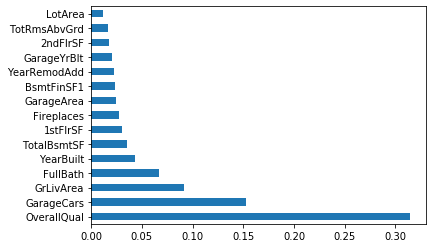

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(df1,df2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df1.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [67]:
#According to this plot, ther most important Qualities are 
#'OverallQual', 'GarageCars', 'GrLivArea', 'FullBath', '1stFlrSF'
# 'YearsBuilt'

In [68]:
from sklearn.feature_selection import f_regression
skb = SelectKBest(score_func = f_regression, k = 'all')
fit = skb.fit(df1, df2)
dfscores = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(df1.columns)
best_features = pd.concat([dfcolumns, dfscores], axis = 1)
best_features.columns = ['Specs', 'Scores']
top1 = best_features.nsmallest(30, 'Scores')

C:\Users\Godwin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
top1

Specs         Scores
3     OverallQual  2.185675e-313
15      GrLivArea  4.518034e-223
25     GarageCars  2.498644e-169
26     GarageArea  5.265038e-158
11    TotalBsmtSF  9.484229e-152
12       1stFlrSF  5.394711e-147
18       FullBath  1.236470e-121
22   TotRmsAbvGrd  2.772281e-108
5       YearBuilt  2.990229e-103
6    YearRemodAdd   3.164948e-96
24    GarageYrBlt   1.279971e-92
7      MasVnrArea   3.656619e-85
23     Fireplaces   6.141487e-80
8      BsmtFinSF1   3.394110e-53
1     LotFrontage   4.687002e-43
27     WoodDeckSF   3.972217e-37
13       2ndFlrSF   5.764335e-36
28    OpenPorchSF   3.493374e-35
19       HalfBath   1.650473e-28
2         LotArea   1.123139e-24
16   BsmtFullBath   1.550344e-18
10      BsmtUnfSF   1.182976e-16
20   BedroomAbvGr   9.927497e-11
21   KitchenAbvGr   1.860426e-07
29  EnclosedPorch   8.255770e-07
31    ScreenPorch   1.972140e-05
32       PoolArea   4.073490e-04
0      MSSubClass   1.266472e-03
4     OverallCond   2.912351e-03
34         MoSold   7.612758e-02

In [70]:
a1 = np.array(top1.Specs)

In [71]:
numeric_sel = df1[a1[:20]]

In [72]:
numeric_sel

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0             7.0     1710.0         2.0       548.0        856.0     856.0   
1             6.0     1262.0         2.0       460.0       1262.0    1262.0   
2             7.0     1786.0         2.0       608.0        920.0     920.0   
3             7.0     1717.0         3.0       642.0        756.0     961.0   
4             8.0     2198.0         3.0       836.0       1145.0    1145.0   
...           ...        ...         ...         ...          ...       ...   
1455          6.0     1647.0         2.0       460.0        953.0     953.0   
1456          6.0     2073.0         2.0       500.0       1542.0    2073.0   
1457          7.0     2340.0         1.0       252.0       1152.0    1188.0   
1458          5.0     1078.0         1.0       240.0       1078.0    1078.0   
1459          5.0     1256.0         1.0       276.0       1256.0    1256.0   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  GarageYrBlt  \
0          2.0           8.0     2003.0        2003.0       2003.0   
1          2.0           6.0     1976.0        1976.0       1976.0   
2          2.0           6.0     2001.0        2002.0       2001.0   
3          1.0           7.0     1915.0        1970.0       1998.0   
4          2.0           9.0     2000.0        2000.0       2000.0   
...        ...           ...        ...           ...          ...   
1455       2.0           7.0     1999.0        2000.0       1999.0   
1456       2.0           7.0     1978.0        1988.0       1978.0   
1457       2.0           9.0     1941.0        2006.0       1941.0   
1458       1.0           5.0     1950.0        1996.0       1950.0   
1459       1.0           6.0     1965.0        1965.0       1965.0   

      MasVnrArea  Fireplaces  BsmtFinSF1  LotFrontage  WoodDeckSF  2ndFlrSF  \
0          196.0         0.0       706.0         65.0         0.0     854.0   
1            0.0         1.0       978.0         80.0       298.0       0.0   
2          162.0         1.0       486.0         68.0         0.0     866.0   
3            0.0         1.0       216.0         60.0         0.0     756.0   
4          350.0         1.0       655.0         84.0       192.0    1053.0   
...          ...         ...         ...          ...         ...       ...   
1455         0.0         1.0         0.0         62.0         0.0     694.0   
1456       119.0         2.0       790.0         85.0       349.0       0.0   
1457         0.0         2.0       275.0         66.0         0.0    1152.0   
1458         0.0         0.0        49.0         68.0       366.0       0.0   
1459         0.0         0.0       830.0         75.0       736.0       0.0   

      OpenPorchSF  HalfBath  LotArea  
0            61.0       1.0   8450.0  
1             0.0       0.0   9600.0  
2            42.0       1.0  11250.0  
3            35.0       0.0   9550.0  
4            84.0       1.0  14260.0  
...           ...       ...      ...  
1455         40.0       1.0   7917.0  
1456          0.0       0.0  13175.0  
1457         60.0       0.0   9042.0  
1458          0.0       0.0   9717.0  
1459         68.0       1.0   9937.0  

[1460 rows x 20 columns]

### Encoding of Multi-Level categorical Data

C:\Users\Godwin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.01262282 0.01378816 0.01057506 0.00950327 0.00948545 0.03543032
 0.00572185 0.00107629 0.01896072 0.01911222 0.02100501 0.0228385
 0.01219542 0.01093104 0.01250026 0.1608691  0.01682938 0.00866949
 0.21470373 0.0034735  0.02145228 0.01453118 0.00806737 0.0050464
 0.00808097 0.00397804 0.1338056  0.0036201  0.02863889 0.0159768
 0.09368927 0.00420463 0.00159905 0.008833   0.00746953 0.0207153 ]


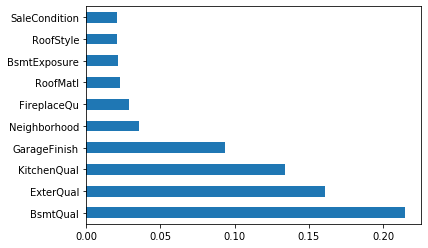

In [73]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(categorical_data12,df2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=categorical_data12.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [74]:
#GarageFiniah, KitchenQual, ExterQual, BsmtQual are pretty

In [75]:
categorical_data12.head()

MSZoning  LotShape  LandContour  LotConfig  LandSlope  Neighborhood  \
0         3         3            3          4          0             5   
1         3         3            3          2          0            24   
2         3         0            3          4          0             5   
3         3         0            3          0          0             6   
4         3         0            3          2          0            15   

   Condition1  Condition2  BldgType  HouseStyle  ...  KitchenQual  Functional  \
0           2           2         0           5  ...            2           6   
1           1           2         0           2  ...            3           6   
2           2           2         0           5  ...            2           6   
3           2           2         0           5  ...            2           6   
4           2           2         0           5  ...            2           6   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0            2           1             1           4           4           2   
1            4           1             1           4           4           2   
2            4           1             1           4           4           2   
3            2           5             2           4           4           2   
4            4           1             1           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 36 columns]

In [76]:
# ohe = OneHotEncoder(sparse = False)
# ohe.fit(categorical_data12)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [77]:
# cat = ohe.transform(categorical_data12)

In [78]:
# count = []
# for i in categorical_data12.columns:
#     a = categorical_data1[list1][i].unique()
#     for j in a:
#         count.append(j)

In [79]:
encoder=OneHotEncoder(sparse=False)
cat1 =  pd.DataFrame (encoder.fit_transform(categorical_data1[list1]))

In [80]:
cat1.columns = encoder.get_feature_names(list1)

C:\Users\Godwin\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[1.21167534e-03 1.13466044e-03 1.50515749e-05 6.59176950e-03
 8.70852444e-04 1.58415913e-03 9.97283317e-04 2.70366365e-04
 5.09938897e-03 8.17704887e-03 9.75949098e-04 1.38997141e-04
 1.25434918e-03 1.67657605e-03 5.33805455e-03 1.31572239e-03
 2.19009163e-04 2.11520670e-03 5.12638787e-03 5.35892828e-03
 1.63423048e-05 4.56778045e-04 1.24368121e-06 3.56919736e-04
 5.44232912e-04 6.16872637e-03 2.86933400e-03 1.39886226e-02
 1.56212555e-03 6.74666368e-04 2.48775988e-04 4.78612715e-04
 4.97992522e-04 3.49170212e-04 5.44908572e-07 2.87333007e-03
 5.64615595e-02 8.90694062e-03 8.66932616e-05 1.10825906e-03
 4.21740829e-04 1.78432087e-04 2.67530158e-03 6.48843152e-03
 2.51238559e-03 4.83401658e-05 1.29961122e-03 1.40611399e-03
 1.86934921e-03 1.25018841e-03 1.67648503e-03 5.61096261e-06
 4.28025234e-05 2.91852939e-07 5.64160064e-05 5.21748271e-08
 1.14008805e-05 2.04233532e-04 1.49992246e-04 2.43107440e-06
 7.61644759e-06 9.86165374e-09 8.46551244e-07 7.95867806e-03
 5.25583285e-05 6.498270

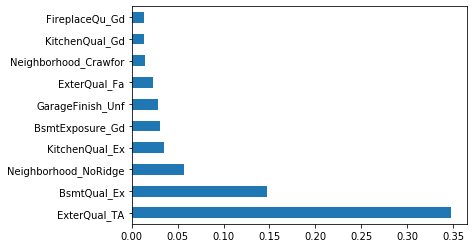

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(cat1,df2)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=cat1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [82]:
from sklearn.feature_selection import f_regression
skb = SelectKBest(score_func = f_regression, k = 'all')
fit = skb.fit(cat1, df2)
dfscores = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(cat1.columns)
best_features = pd.concat([dfcolumns, dfscores], axis = 1)
best_features.columns = ['Specs', 'Scores']
top3 = best_features.nsmallest(30, 'Scores')

C:\Users\Godwin\miniconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [83]:
top3

Specs         Scores
128           ExterQual_TA  4.309567e-137
140            BsmtQual_Ex  9.157709e-118
183         KitchenQual_TA  1.285609e-101
204       GarageFinish_Unf   3.306268e-99
180         KitchenQual_Ex   6.256631e-95
143            BsmtQual_TA   1.425350e-92
136       Foundation_PConc   3.124704e-92
127           ExterQual_Gd   1.380858e-74
125           ExterQual_Ex   4.067724e-74
154       BsmtFinType1_GLQ   2.544986e-68
170           HeatingQC_Ex   2.655184e-68
202       GarageFinish_Fin   2.274204e-63
37    Neighborhood_NridgHt   7.301451e-58
123        MasVnrType_None   6.741986e-48
224           SaleType_New   2.945147e-45
201      GarageType_Detchd   2.198791e-44
232  SaleCondition_Partial   7.520572e-44
135      Foundation_CBlock   1.230156e-41
124       MasVnrType_Stone   1.524740e-38
36    Neighborhood_NoRidge   1.568493e-38
182         KitchenQual_Gd   1.721216e-36
151        BsmtExposure_No   4.092466e-36
174           HeatingQC_TA   1.776432e-34
149        BsmtExposure_Gd   2.660656e-33
118    Exterior2nd_VinylSd   4.181393e-33
102    Exterior1st_VinylSd   8.278134e-33
4              MSZoning_RM   2.697098e-29
8             LotShape_Reg   2.244374e-25
191         FireplaceQu_Ex   3.809392e-23
3              MSZoning_RL   2.077258e-21

In [84]:
a3 = np.array(top3.Specs)

In [85]:
multi_cat = cat1[a3[:18]]

#### Finalizing the dataset.

In [86]:
final = pd.concat([multi_cat, numeric_sel, binary_leveled_data, df2], axis = 1)

In [87]:
final

ExterQual_TA  BsmtQual_Ex  KitchenQual_TA  GarageFinish_Unf  \
0              0.0          0.0             0.0               0.0   
1              1.0          0.0             1.0               0.0   
2              0.0          0.0             0.0               0.0   
3              1.0          0.0             0.0               1.0   
4              0.0          0.0             0.0               0.0   
...            ...          ...             ...               ...   
1455           1.0          0.0             1.0               0.0   
1456           1.0          0.0             1.0               1.0   
1457           0.0          0.0             0.0               0.0   
1458           1.0          0.0             0.0               1.0   
1459           0.0          0.0             1.0               0.0   

      KitchenQual_Ex  BsmtQual_TA  Foundation_PConc  ExterQual_Gd  \
0                0.0          0.0               1.0           1.0   
1                0.0          0.0               0.0           0.0   
2                0.0          0.0               1.0           1.0   
3                0.0          1.0               0.0           0.0   
4                0.0          0.0               1.0           1.0   
...              ...          ...               ...           ...   
1455             0.0          0.0               1.0           0.0   
1456             0.0          0.0               0.0           0.0   
1457             0.0          1.0               0.0           0.0   
1458             0.0          1.0               0.0           0.0   
1459             0.0          1.0               0.0           1.0   

      ExterQual_Ex  BsmtFinType1_GLQ  ...  BsmtFinSF1  LotFrontage  \
0              0.0               1.0  ...       706.0         65.0   
1              0.0               0.0  ...       978.0         80.0   
2              0.0               1.0  ...       486.0         68.0   
3              0.0               0.0  ...       216.0         60.0   
4              0.0               1.0  ...       655.0         84.0   
...            ...               ...  ...         ...          ...   
1455           0.0               0.0  ...         0.0         62.0   
1456           0.0               0.0  ...       790.0         85.0   
1457           1.0               1.0  ...       275.0         66.0   
1458           0.0               1.0  ...        49.0         68.0   
1459           0.0               0.0  ...       830.0         75.0   

      WoodDeckSF  2ndFlrSF  OpenPorchSF  HalfBath  LotArea  CentralAir  \
0            0.0     854.0         61.0       1.0   8450.0           1   
1          298.0       0.0          0.0       0.0   9600.0           1   
2            0.0     866.0         42.0       1.0  11250.0           1   
3            0.0     756.0         35.0       0.0   9550.0           1   
4          192.0    1053.0         84.0       1.0  14260.0           1   
...          ...       ...          ...       ...      ...         ...   
1455         0.0     694.0         40.0       1.0   7917.0           1   
1456       349.0       0.0          0.0       0.0  13175.0           1   
1457         0.0    1152.0         60.0       0.0   9042.0           1   
1458       366.0       0.0          0.0       0.0   9717.0           1   
1459       736.0       0.0         68.0       1.0   9937.0           1   

      Street  SalePrice  
0          1     208500  
1          1     181500  
2          1     223500  
3          1     140000  
4          1     250000  
...      ...        ...  
1455       1     175000  
1456       1     210000  
1457       1     266500  
1458       1     142125  
1459       1     147500  

[1460 rows x 41 columns]

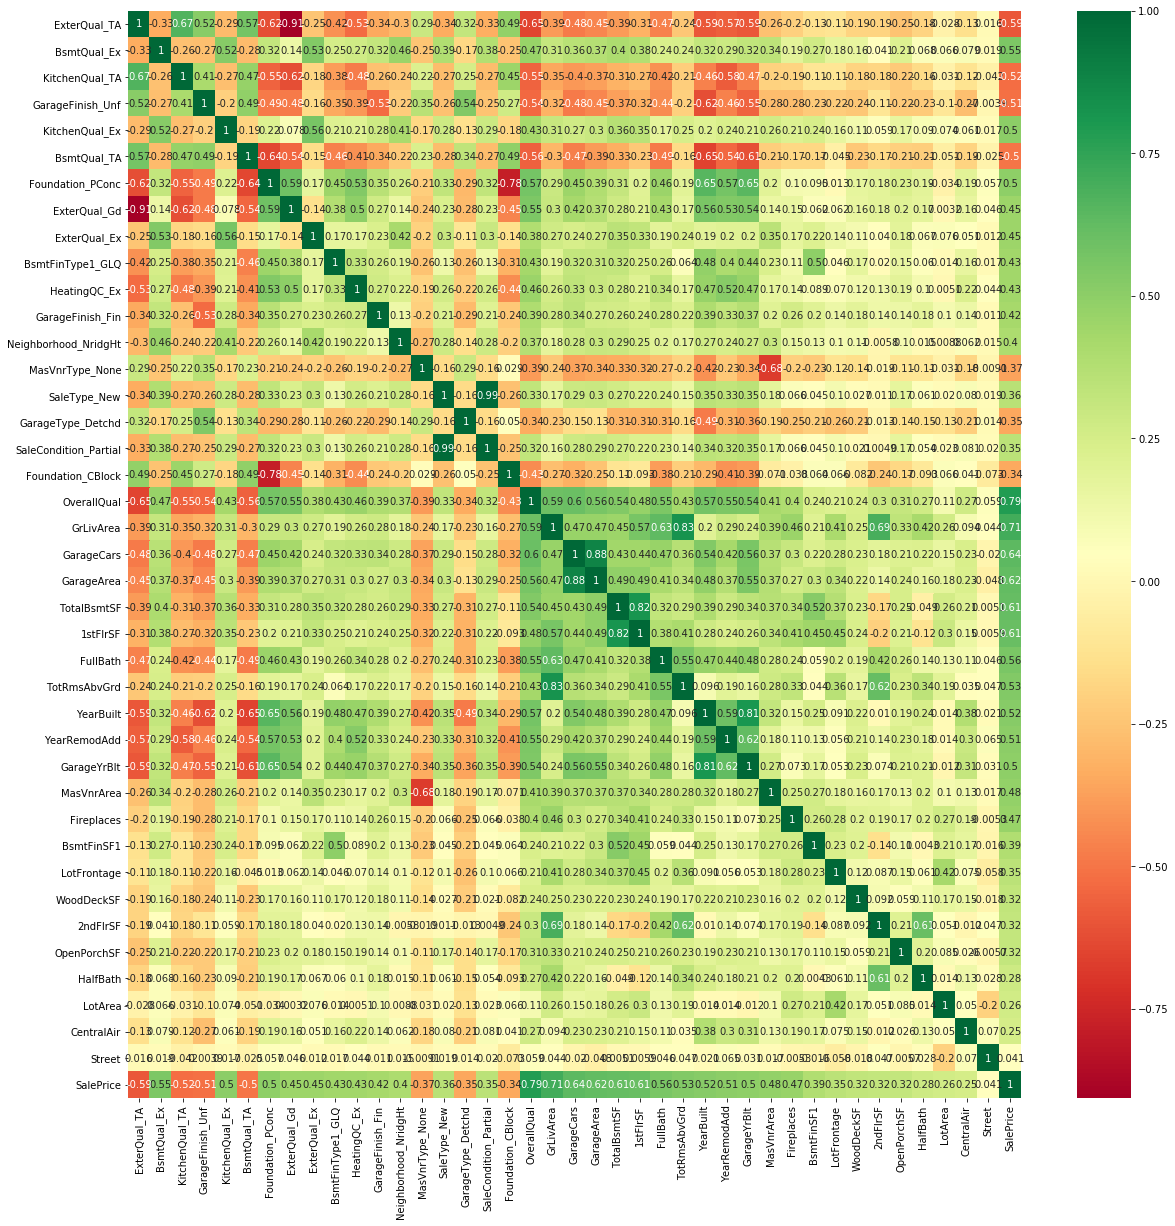

In [88]:
data = final
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Modelling


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split, StratifiedKFold 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [90]:
X = final.drop(columns = 'SalePrice')
Y = final['SalePrice']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


### Linear Regression


In [92]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
coeff_df = pd.DataFrame(regression.coef_, X.columns, columns=['Coefficient'])  


In [94]:
y_pred = regression.predict(X_test)

In [95]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual      Predicted
892   154500  151720.084929
1105  325000  307473.038387
413   115000  128760.882813
522   159000  173513.556879
1036  315500  310351.477851
...      ...            ...
1330  227000  241758.461311
1103  159500  165276.466539
752   217000  193864.954877
1353  410000  312847.710143
376   148000  142831.244847

[584 rows x 2 columns]

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 value:', np.sqrt(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 22519.500301510874
Mean Squared Error: 1237762468.8848534
Root Mean Squared Error: 35181.84857117166
R2 value: 0.9106140820891555


## Decision Trees

In [99]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [100]:
y_pred1 = dtr.predict(X_test)

In [101]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
df

Actual  Predicted
892   154500   136000.0
1105  325000   302000.0
413   115000   109900.0
522   159000   155000.0
1036  315500   325000.0
...      ...        ...
1330  227000   239000.0
1103  159500   129900.0
752   217000   201000.0
1353  410000   340000.0
376   148000   142500.0

[584 rows x 2 columns]

In [104]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2 score:', metrics.r2_score(y_test, y_pred1))

Mean Absolute Error: 28509.765410958906
Mean Squared Error: 2602124209.4297943
Root Mean Squared Error: 51011.02047038262
R2 score: 0.6409683028894785


### Random Forest

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [106]:
y_pred3 = rf.predict(X_test)

In [107]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})
df

Actual      Predicted
892   154500  140308.500000
1105  325000  313883.240000
413   115000  120183.500000
522   159000  149983.340000
1036  315500  323149.240000
...      ...            ...
1330  227000  242890.220000
1103  159500  139858.500000
752   217000  195224.320000
1353  410000  364689.000000
376   148000  138257.166667

[584 rows x 2 columns]

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('R2 value:', metrics.r2_score(y_test, y_pred3))

Mean Absolute Error: 17904.149811643834
Mean Squared Error: 874046929.8116106
Root Mean Squared Error: 29564.28469981323
R2 value: 0.8794021624996644


###  Random Forest AdaBoost

In [109]:
from sklearn.ensemble import AdaBoostRegressor

rf_adaboost = AdaBoostRegressor(rf,random_state=0, n_estimators=100)
rf_adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=100,
                    

In [110]:
y_pred3adaboost = rf_adaboost.predict(X_test)

In [111]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3adaboost})
df3

Actual      Predicted
892   154500  137839.000000
1105  325000  309464.590000
413   115000  115364.500000
522   159000  148370.686667
1036  315500  311573.710000
...      ...            ...
1330  227000  247020.160000
1103  159500  144413.000000
752   217000  199613.500000
1353  410000  350936.030000
376   148000  136288.720000

[584 rows x 2 columns]

In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3adaboost))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3adaboost))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3adaboost)))
print('R2 value:', metrics.r2_score(y_test, y_pred3adaboost))

Mean Absolute Error: 17030.34013372472
Mean Squared Error: 807550358.3509699
Root Mean Squared Error: 28417.430537453063
R2 value: 0.8885771191819885


## Random Forest Gradient Boosting 

In [113]:
from sklearn.ensemble import GradientBoostingRegressor
rf_gb = GradientBoostingRegressor()
rf_gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [114]:
y_pred3et = rf_gb.predict(X_test)

In [115]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3et))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3et))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3et)))
print('R2 value:', metrics.r2_score(y_test, y_pred3et))

Mean Absolute Error: 18101.238551492967
Mean Squared Error: 995257368.3524858
Root Mean Squared Error: 31547.699890047228
R2 value: 0.8626779841152755


### XGBoost Regressor

In [116]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

[21:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [117]:
y_pred3xgb = xgb.predict(X_test)

In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3xgb))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3xgb))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3xgb)))
print('R2 value:', metrics.r2_score(y_test, y_pred3xgb))

Mean Absolute Error: 18043.611629120292
Mean Squared Error: 1064678723.4226654
Root Mean Squared Error: 32629.415002764996
R2 value: 0.8530994763575614


In [ ]:
xgb

### SVM

In [120]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [121]:
y_pred2 = svm.predict(X_test)

In [122]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
df

Actual      Predicted
892   154500  164921.174198
1105  325000  164952.533012
413   115000  164924.379592
522   159000  164902.659247
1036  315500  164954.723704
...      ...            ...
1330  227000  164934.095694
1103  159500  164924.483820
752   217000  164928.741631
1353  410000  164970.111962
376   148000  164923.449449

[584 rows x 2 columns]

In [123]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('Root Mean Squared Error:', metrics.r2_score(y_test, y_pred2))

Mean Absolute Error: 57858.19618006997
Mean Squared Error: 7551671403.755545
Root Mean Squared Error: 86900.353300522
Root Mean Squared Error: -0.04195233658944919


# Test Results

In [ ]:
dataframe1 = pd.read_csv('test.csv')

In [ ]:
dataframe1.head()

In [ ]:
dataframe1 = dataframe1.drop(columns = ['Id','Alley', 'PoolQC', 'Fence', 'MiscFeature', ])

In [ ]:
numeric_data_test = dataframe1.select_dtypes(include=[np.number])
categorical_data_test = dataframe1.select_dtypes(exclude=[np.number])

In [ ]:

print('Missing: %d' % sum(np.isnan(numeric_data_test.values).flatten()))

### Missing Value Treatment

First we'll look at the Numeric data.

In [ ]:
X_test = numeric_data_test.values


In [ ]:

print('Missing: %d' % sum(np.isnan(X_test).flatten()))

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(X_test)
Xtrans_test = imputer.transform(X_test)

In [ ]:
from numpy import isnan
print('Missing: %d' % sum(np.isnan(Xtrans_test).flatten()))

In [ ]:
df1_test = pd.DataFrame(data = Xtrans_test, columns = numeric_data_test.columns)

In [ ]:
#Feature-Selection for numeric data-types
numeric_sel_test = df1_test[a1[:20]]

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(categorical_data_test)
x_cat = imp.transform(categorical_data_test)
categorical_data_test1 = pd.DataFrame(data = x_cat, columns = categorical_data_test.columns)

In [ ]:
#Encoding of the categorical data
categorical_data_test11 = categorical_data_test1[list2].apply(LabelEncoder().fit_transform)

In [2]:
categorical_data_test12 = categorical_data_test1[list1].apply(LabelEncoder().fit_transform)

NameError: name 'categorical_data_test1' is not defined

In [ ]:
#Feature Selection of binary data
binary_leveled_data_test = categorical_data_test11[['CentralAir', 'Street']]

In [ ]:
binary_leveled_data_test

In [ ]:
ohe = OneHotEncoder(sparse = False)
cat_test1 = pd.DataFrame(ohe.fit_transform( categorical_data_test1[list1]))

In [ ]:
cat_test1.columns = ohe.get_feature_names(list1)

In [ ]:
#Multi-Level data
multi_cat_test = cat_test1[a3[:18]]

In [ ]:
#Final Test Data
final_test = pd.concat([multi_cat_test, numeric_sel_test, binary_leveled_data_test], axis = 1)

In [ ]:
final_test

## Test Prediction

### Linear Regression

In [ ]:
y_regression_test = regression.predict(final_test)

In [ ]:
y_dtr_test = dtr.predict(final_test)

In [ ]:
y_rf_test = rf.predict(final_test)

In [ ]:
y_xgb_test = xgb.predict(final_test)

In [ ]:
dataframe_test= pd.read_csv('test.csv')

In [ ]:
xgb = pd.DataFrame(data = y_xgb_test, columns = ['SalePrice'])
xgb1 = pd.concat([dataframe_test['Id'], xgb], axis = 1)

In [ ]:
regression = pd.DataFrame(data = y_regression_test, columns = ['SalePrice'])
regression1 = pd.concat([dataframe_test['Id'], regression], axis = 1)

In [ ]:
dtr = pd.DataFrame(data = y_dtr_test, columns = ['SalePrice'])
dtr1 = pd.concat([dataframe_test['Id'], dtr], axis = 1)

In [ ]:
rf = pd.DataFrame(data = y_rf_test, columns = ['SalePrice'])
rf1 = pd.concat([dataframe_test['Id'], rf], axis = 1)

In [ ]:
regression1.to_csv('regression1.csv', index = False)
dtr1.to_csv('dtr1.csv', index = False)
rf1.to_csv('rf1.csv', index = False)

In [ ]:
xgb1.to_csv('xgb.csv', index = False)